# Sklearn

## sklearn.datasets

документация: http://scikit-learn.org/stable/datasets/

In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация выборок

**Способы генерации данных:** 
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

#### datasets.make_circles

In [3]:
circles = datasets.make_circles()

In [4]:
print "features: {}".format(circles[0][:10])
print "target: {}".format(circles[1][:10])

SyntaxError: invalid syntax (<ipython-input-4-f042714d5586>, line 1)

In [5]:
from matplotlib.colors import ListedColormap

RuntimeError: matplotlib does not support generators as input

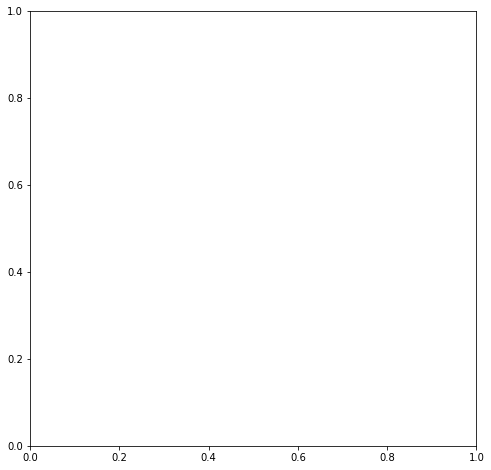

In [6]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.scatter(map(lambda x: x[0], circles[0]), map(lambda x: x[1], circles[0]), c = circles[1], cmap = colors)

In [ ]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c = data[1], cmap = colors)

In [ ]:
noisy_circles = datasets.make_circles(noise = 0.15)

In [ ]:
plot_2d_dataset(noisy_circles, colors)

#### datasets.make_classification

In [ ]:
simple_classification_problem = datasets.make_classification(n_features = 2, n_informative = 1, 
                                                            n_redundant = 1, n_clusters_per_class = 1,
                                                            random_state = 1 )

In [ ]:
plot_2d_dataset(simple_classification_problem, colors)

In [ ]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

In [ ]:
plot_2d_dataset(classification_problem, colors)

### "Игрушечные" наборы данных

**Наборы данных:** 
* load_iris 
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

#### datasets.load_iris

In [10]:
iris = datasets.load_iris()

In [ ]:
iris

In [ ]:
iris.keys()

In [ ]:
print iris.DESCR

In [ ]:
print "feature names: {}".format(iris.feature_names)
print "target names: {names}".format(names = iris.target_names)

In [ ]:
iris.data[:10]

In [ ]:
iris.target

### Визуализация выбокри

In [7]:
from pandas import DataFrame

In [11]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

In [12]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

In [14]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d054dff60>]],
      dtype=object)

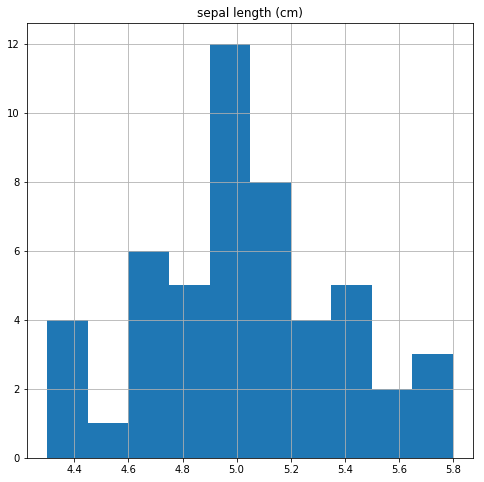

In [15]:
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)')

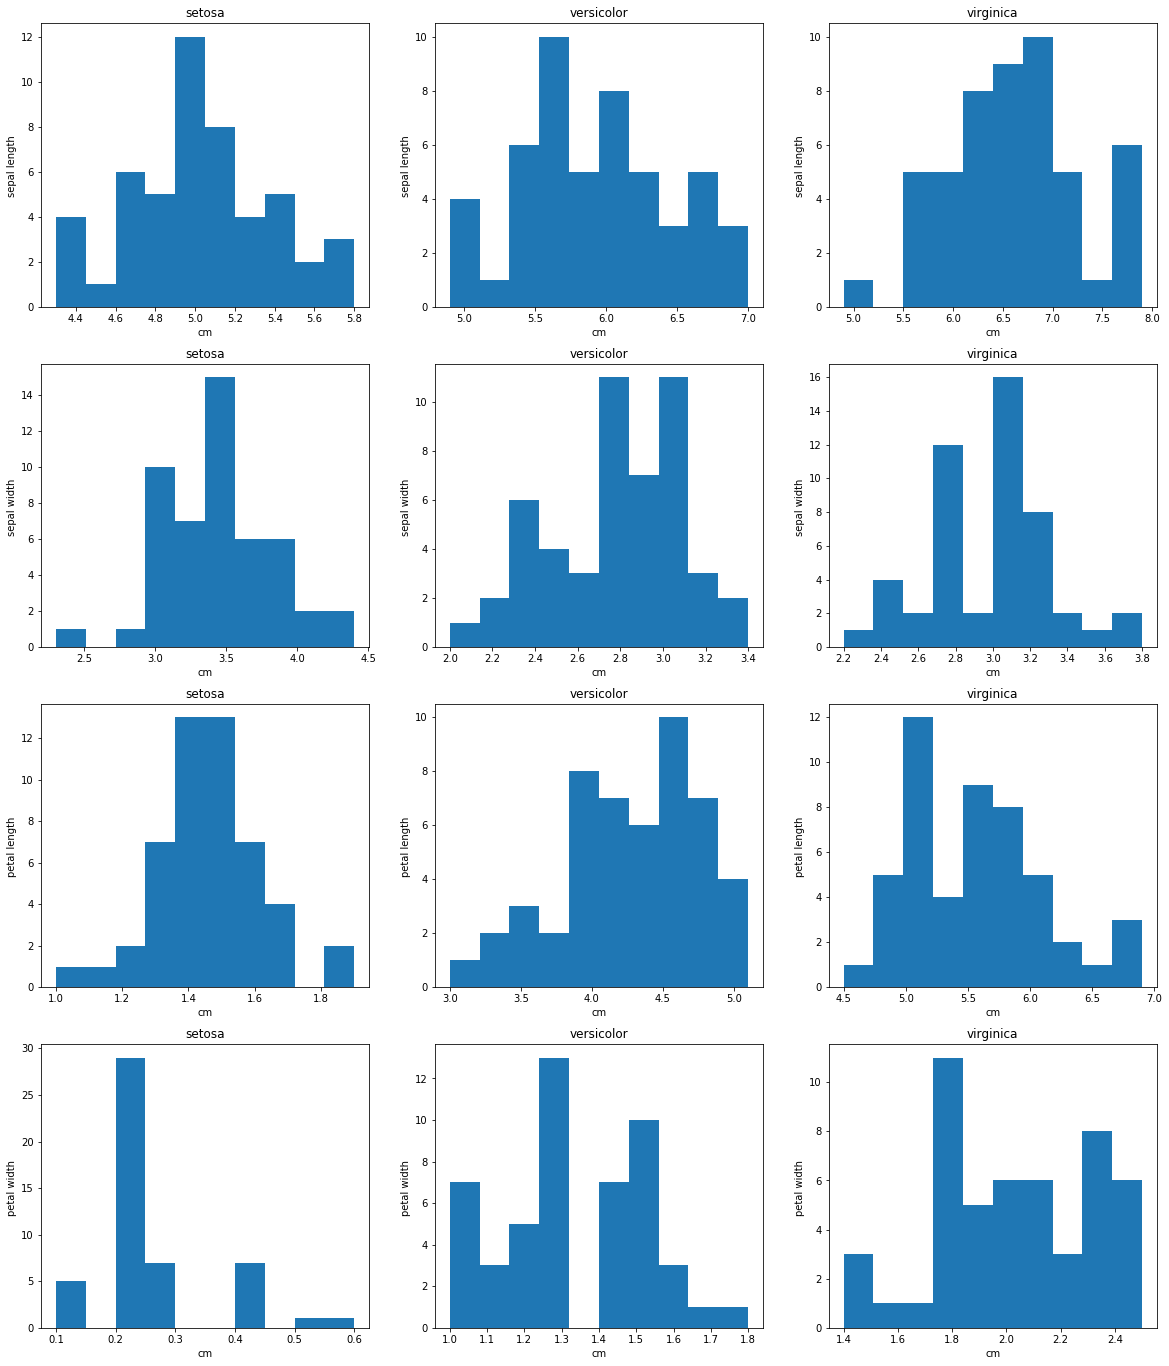

In [16]:
pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

### Бонус: библиотека seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(iris_frame, hue = 'target')

In [ ]:
?sns.set()

In [ ]:
sns.set(font_scale = 1.3)
data = sns.load_dataset("iris")
sns.pairplot(data, hue = "species")

#### **Если Вас заинтересовала библиотека seaborn:**
* установка: https://stanford.edu/~mwaskom/software/seaborn/installing.html
* установка c помощью анаконды: https://anaconda.org/anaconda/seaborn
* руководство: https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
* примеры: https://stanford.edu/~mwaskom/software/seaborn/examples/